<a href="https://colab.research.google.com/github/coraldx5/generativeai_intro_book/blob/master/chap04_movie_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第4章：文章分類問題を解いてみよう
- 映画レビューの良し/悪しを分類するモデルを作成します

- 本Notebookのゴール感
  - Collaboratory上でのPythonの動かし方を体験する
  - コードを動かしながら自然言語処理に対する理解を深める

# Colab上でデータを確認しよう

## 必要なライブラリのインストール
- [PIP（Python Package Index）](https://pypi.org/)から必要なライブラリ（拡張機能のようなもの）を取得します
  - PIPとはPython用のソフトウェアの**リポジトリ**です
    - **リポジトリ**とは、様々なソフトウェアやデータが保管されている場所です。
  - PIPはインターネット上に存在し、ソフトウェアのコードや関連データが公開され、基本的には誰でもアクセスできる状態になっています。
  - PIPを利用することで、必要なソフトウェアを次のように簡単にダウンロードし、インストールすることができます。
- 次のセルでは、[janome](https://pypi.org/project/Janome/)という形態素解析ツールをダウンロードします
  - 形態素解析とは、自然言語の文章を単語に分割し、それぞれの品詞を特定する処理のことを指します。日本語のテキストを扱う際に特に有効で、機械学習やデータ分析の前処理として広く用いられます。

In [1]:
# PIPから「janome」をダウンロードしてインストールします
!pip install janome==0.5.0 #←バージョンを0.5.0に固定しています

# 【参考】次のコードでは可視化用の日本語フォントをインストールします
# 本書では明示的には扱いませんが、皆さんが試行錯誤する過程で日本語の表を出力することを想定して事前に準備しています
!pip install japanize_matplotlib==1.1.3
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=59af3f55408e4cbec39d51226c95651234a22af00c70a68727c406b67fd8baae
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


## 学習に使うデータの準備
- 今回は、レビュー文章と、良し悪し（good/bad）が記述されているCSVファイルをダウンロードして使用します[リンクテキスト](https://)

In [ ]:
# GitHubからCSVファイルをダウンロードします
!wget https://raw.githubusercontent.com/coraldx5/generativeai_intro_book/master/movie_review_jpn.csv

--2024-07-01 12:34:56--  https://raw.githubusercontent.com/coraldx5/generativeai_intro_book/master/movie_review_jpn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12920 (13K) [text/plain]
Saving to: ‘movie_review_jpn.csv’

movie_review_jpn.cs 100%[===================>]  12.62K  --.-KB/s    in 0s      

2024-07-01 12:34:57 (81.2 MB/s) - ‘movie_review_jpn.csv’ saved [12920/12920]



## 読み込んだCSVファイルの中身を確認

In [ ]:
import pandas as pd
mreview_df = pd.read_csv("movie_review_jpn.csv")  #← データを読み込んで`mreview_df`という変数に代入します
mreview_df #← データを表示させます

,result,comment
0,good,キャラクターたちの感情的な旅路が感動的で、心に残りました。
1,bad,キャラクターたちの関係が浅く、深みがありませんでした。
2,good,キャラクターたちの成長が感動的で、彼らの旅に共感しました。
3,good,キャラクターたちの成長と絆が感動的で、深い感情を呼び覚ました。
4,bad,キャラクターたちの成長と絆が不明瞭で、感情が伝わりませんでした。
...,...,...
123,bad,場面転換が唐突で、ストーリーの流れが断片的に感じられました。
124,bad,主要な登場人物が途中で色褪せてしまい、最後まで引っ張る力が不足していた。
125,bad,感動を誘う場面が意図的過ぎて、逆に冷めた感情を抱かせてしまいます。
126,bad,説明が多過ぎて映画としてのエンターテイメント性が損なわれていました。


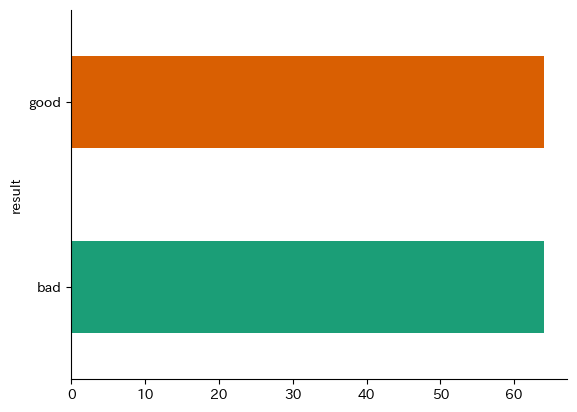

In [ ]:
# 【参考】「グラフを提案」(suggest charts)機能によって自動生成されたコードです
from matplotlib import pyplot as plt
import seaborn as sns
mreview_df.groupby('result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Ratio of good and bad reviews for comments containing "キャラクター"')

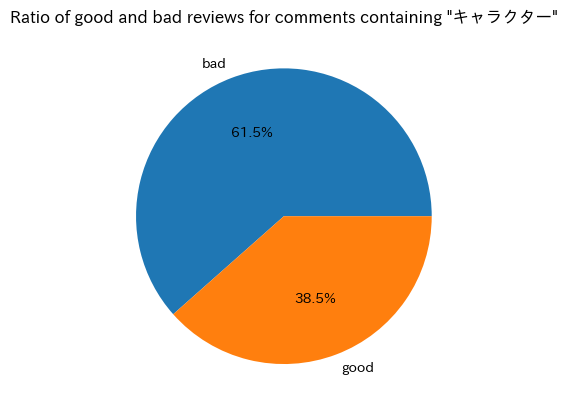

In [ ]:
# prompt: DataFrame mreview_df を使用: comment列に「キャラクター」が含まれているデータについて、result列のgoodとbadの割合を示す円グラフを作って

import matplotlib.pyplot as plt

# Filter the dataframe to include only rows where the comment contains the word "キャラクター"
filtered_df = mreview_df[mreview_df['comment'].str.contains('キャラクター')]

# Group the filtered dataframe by the result column and count the number of occurrences
grouped_df = filtered_df.groupby('result').size()

# Create a pie chart
plt.pie(grouped_df, labels=grouped_df.index, autopct="%1.1f%%")
plt.title('Ratio of good and bad reviews for comments containing "キャラクター"')

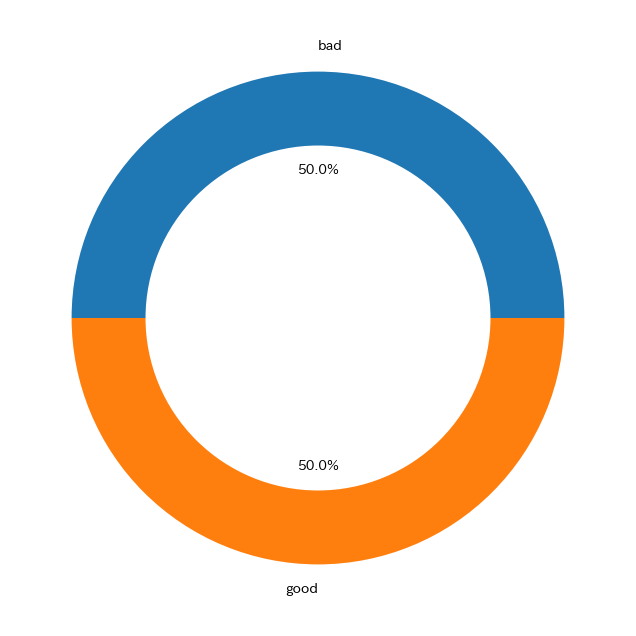

In [ ]:
# 【参考】コード生成(generate code using this dataframe)によって自動生成されたコードです
# prompt: DataFrame mreview_df を使用: result列を種類別に示すドーナツ図を作って

import matplotlib.pyplot as plt
import seaborn as sns

# Group data by result
grouped_data = mreview_df.groupby('result').size()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")

# Add center circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#

# 学習用データを準備しよう

## 学習データと評価データを分割
- Colabに予め準備されている`sklearn`（`scikit-learn`）ライブラリから必要な機能をインポートして使います

In [ ]:
from sklearn.model_selection import train_test_split

# ラベル（good/bad）と文章を分ける
labels = mreview_df['result'].values
sentences = mreview_df['comment'].values

# ラベルを数値に変換
label_dic = {'good': 1, 'bad': 0}
label_ids = [label_dic[i] for i in labels]

# 学習データと評価用データを7:3に分割する
train_sentence, test_sentence, y_train, y_test = train_test_split(sentences, label_ids, test_size=0.3, random_state=0)

# 分析機（アナライザ）を作成しよう

## 形態素分析を行う`janome`の準備

In [ ]:
# 本ノートブックの最初にPIPからインストールしたJanomeから、必要な機能をインポートします
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.charfilter import UnicodeNormalizeCharFilter, RegexReplaceCharFilter
from janome.tokenfilter import POSKeepFilter

# ひらがな一文字で構成されるトークンを除外するカスタムトークンフィルターを定義します
'''
参考：この部分のコードを理解して頂く必要はありません
'''
from janome.tokenfilter import TokenFilter
class SingleHiraganaFilter(TokenFilter):
    def apply(self, tokens):
        for token in tokens:
            # トークンがひらがな一文字なら除外
            if len(token.surface) == 1 and 'ぁ' <= token.surface <= 'ん':
                continue
            yield token

## トークナイズ処理のみを行う分析器（アナライザ）を試してみる

In [ ]:
# トークナイズ対象となる文章の定義
test_text = '映画のｸﾗｲﾏｯｸｽで、泣かされました！'
# TokenizerのみでAnalyzerを作成する
tk_analyzer = Analyzer(char_filters=[
                                    # char_filterを定義しない（空にしておく）
                                    ],
                       tokenizer=Tokenizer(),
                       token_filters=[
                                    # token_filterを定義しない（空にしておく）
                                     ],
                      )

# トークナイズを実行して、各トークンの解析結果を出力する
for token in tk_analyzer.analyze(test_text):
    print(token)

映画	名詞,一般,*,*,*,*,映画,エイガ,エイガ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
ｸﾗｲﾏｯｸｽ	名詞,一般,*,*,*,*,ｸﾗｲﾏｯｸｽ,*,*
で	助詞,格助詞,一般,*,*,*,で,デ,デ
、	記号,読点,*,*,*,*,、,、,、
泣かさ	動詞,自立,*,*,五段・サ行,未然形,泣かす,ナカサ,ナカサ
れ	動詞,接尾,*,*,一段,連用形,れる,レ,レ
まし	助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
！	記号,一般,*,*,*,*,！,！,！


## 複数のフィルタを組み合わせた分析器を作ってみる

In [ ]:
# 複数のフィルタを定義した分析器（my_analyzer）を定義します
my_analyzer = \
Analyzer(char_filters=[
                      UnicodeNormalizeCharFilter(),
                      RegexReplaceCharFilter(r"[、。!]+", "")
                      ],
          tokenizer=Tokenizer(),
          token_filters=[
                        POSKeepFilter(["名詞","形容詞","動詞"]),
                        SingleHiraganaFilter()
                        ],
        )

# 文章をxとして受け取って解析結果を表層形（.surface）として返す関数（janome_analyzer）の定義
# 表層形：文字列の中で使われているそのままの形。
def janome_analyzer(x):
    return [token.surface for token in my_analyzer.analyze(x)]

## 試しに`janome_analyzer`を使ってみる

In [ ]:
# 文章を自由に変更して実行してみましょう
test_text = '映画のｸﾗｲﾏｯｸｽで、泣かされました！'
janome_analyzer(test_text)

['映画', 'クライマックス', '泣かさ']

### 参考：Analyzerの詳細挙動を確認する

In [ ]:
# UnicodeNormalizeCharFilter
# 正規化を行い、半角全角文字の統一を行います
test_text = '映画のｸﾗｲﾏｯｸｽで、泣かされました！'
#
a = Analyzer(char_filters=[UnicodeNormalizeCharFilter()])
for token in a.analyze(test_text):
    print(token)

In [ ]:
test_text = '映画のｸﾗｲﾏｯｸｽで、泣かされました！'
# UnicodeNormalizeCharFilter
# 正規表現を用いて特定パターンの置換を行います
a = Analyzer(char_filters=[RegexReplaceCharFilter(r"[、。!]+", "")])
for token in a.analyze(test_text):
    print(token)

In [ ]:
test_text = '映画のｸﾗｲﾏｯｸｽで、泣かされました！'
# POSKeepFilter
# 特定の品詞のみ抽出します
a = Analyzer(token_filters=[POSKeepFilter(["名詞","形容詞","動詞"])])
for token in a.analyze(test_text):
    print(token)

In [ ]:
test_text = '映画のｸﾗｲﾏｯｸｽで、泣かされました！'
# POSKeepFilter
# 特定の品詞のみ抽出します
a = Analyzer(token_filters=[SingleHiraganaFilter()])
for token in a.analyze(test_text):
    print(token)

# 単語文書行列を作成しよう

## ベクトル化して単語文書行列を作成

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# janome_analyzerを使用してベクトル化を行う機能を定義します
vectorizer = CountVectorizer(analyzer=janome_analyzer)

# 学習用データに対して単語の語彙を学習し、ベクトル化を行います
X_train = vectorizer.fit_transform(train_sentence)
# 評価用データに対して、学習済みの語彙でベクトル化を行います
X_test = vectorizer.transform(test_sentence)

## CountVectorizerで作成した単語文書行列を確認

In [ ]:
# Trainの上から10件だけ可視化しています
vector_array = X_train[:10].toarray()
df = pd.DataFrame(data=vector_array,columns = vectorizer.get_feature_names_out())
df

,あふれる,あり,ある,いる,うまく,おら,おり,くれ,こと,させ,...,難しく,雰囲気,非常,音楽,響き,響く,驚き,驚く,高く,魅力
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TfidfVectorizerで単語文書行列を作成

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=janome_analyzer)
X_train = vectorizer.fit_transform(train_sentence)
X_test = vectorizer.transform(test_sentence)

# 先ほどと同様、Trainの上から10件だけ可視化しています
vector_array = X_train[:10].toarray()
df = pd.DataFrame(data=vector_array,columns = vectorizer.get_feature_names_out())
df

,あふれる,あり,ある,いる,うまく,おら,おり,くれ,こと,させ,...,難しく,雰囲気,非常,音楽,響き,響く,驚き,驚く,高く,魅力
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
2,0.388213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.528493,0.0,0.528493,0.0,0.0,0.0,0.0,0.000000,0.00000
4,0.000000,0.333248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
5,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
6,0.000000,0.252567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.379706,0.00000
7,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000
8,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.41513
9,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000


# ロジスティック回帰モデルを作ろう

## モデル作成と結果の確認

In [ ]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデルを初期化
lr = LogisticRegression(random_state=0)

# モデルを学習用データで学習する
# X_trainは特徴量、y_trainはターゲット変数
lr.fit(X_train, y_train)

# 評価用データを使用して予測を行い、y_predに代入
# X_testは新しいデータの特徴量
y_pred = lr.predict(X_test)
# 予測結果の表示（評価用データの数だけ、0/1の値が出力されます
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

## 混同行列を生成

In [ ]:
from sklearn.metrics import confusion_matrix
# 実際のラベルと予測ラベルを比較して混同行列を生成
# y_testは評価用データのラベル
cm = confusion_matrix(y_test, y_pred)

# 混同行列をDataFrameに変換して視覚的にわかりやすく表示
# 列名と行名にラベルを設定して何を示しているのか明確にする
confusionmatrix=pd.DataFrame(cm, columns=['"good"と予測', '"bad"と予測'], index=['正解が"good"', '正解が"bad"'])
confusionmatrix

,"""good""と予測","""bad""と予測"
"正解が""good""",14,2
"正解が""bad""",9,14


## 各種の評価指標を出力

In [ ]:
# 各種の評価指標を小数第2位までの％で出力します
# {:.2f} は、小数点以下を2桁にフォーマットするための指示です。
# 各指標の計算後に * 100 を追加して、割合をパーセント値に変換します。
print(f'正解率: {((cm[0][0] + cm[1][1]) / len(y_test) * 100):.2f}%')
print(f'適合率: {(cm[1][1] / (cm[1][1] + cm[0][1]) * 100):.2f}%')
print(f'再現率: {(cm[1][1] / (cm[1][1] + cm[1][0]) * 100):.2f}%')

正解率: 71.79%
適合率: 87.50%
再現率: 60.87%


## モデルの出力結果を可視化する
- 特にロジスティック回帰モデルの係数を基にして、テキスト中の各単語がモデルにとってどのような重要性を持っているかを色で表現します。
- 正の係数は赤色、負の係数は青色でハイライトされ、係数の絶対値が大きいほどその色が濃くなります。
- これにより、モデルの決定にどのような単語が影響を与えているかを直感的に理解することができます。

In [ ]:
'''
参考：このコードセルの内容を理解する必要はありません
'''
# 必要なモジュールをインポート
from IPython.display import display, HTML

# 赤くハイライトする関数の定義
def highlight_r(word, attn):
    # 赤色の濃さを調整
    html_color = '#%02X%02X%02X' % (255, int(255*(1 - attn)), int(255*(1 - attn)))
    return '<span style="background-color: {}">{}</span>'.format(html_color, word)

# 青くハイライトする関数の定義
def highlight_b(word, attn):
    # 青色の濃さを調整
    html_color = '#%02X%02X%02X' % (int(255*(1 - attn)), int(255*(1 - attn)), 255)
    return '<span style="background-color: {}">{}</span>'.format(html_color, word)

# 解析結果を表示する関数の定義
def show_explanation(texts):
    # 単語とそのロジスティック回帰モデルの係数を辞書として取得
    coef_dic = {j: i for i, j in zip(lr.coef_[0], vectorizer.get_feature_names_out())}
    # 文章を単語リストとして取得
    scores = []
    for w in texts:
        try:
            s = coef_dic[w]  # 単語に対応する係数を取得
        except KeyError:
            s = 0  # 辞書にない単語の場合、係数を0とする
        scores.append(s)

    # 文章の各単語を係数の値に基づいてハイライト
    html_outputs = []
    for word, attn in zip(texts, scores):
        if attn < 0:
            html_outputs.append(highlight_b(word, attn*-1))  # 係数が負の場合、青でハイライト
        else:
            html_outputs.append(highlight_r(word, attn))  # 係数が正の場合、赤でハイライト

    # 結果をHTMLとして表示
    display(HTML(' '.join(html_outputs)))

In [ ]:
# 数値をラベルに変換する辞書
label_dic_inv = {0: "bad", 1: "good"}

# 評価用データから5つを取り出して可視化
for i in range(5):
  print('---'*20)
  print(f'元々の文章：「{test_sentence[i]}」')
  # 対象の文の単語を解析して、その単語の係数を取得
  vis_text = janome_analyzer(test_sentence[i])
  show_explanation(vis_text)
  print(f'- 予測結果：{label_dic_inv[y_pred[i]]}')
  print(f'- 正解：{label_dic_inv[y_test[i]]}')

------------------------------------------------------------
元々の文章：「映画のメッセージが非常に力強く、考えさせられました。」


- 予測結果：good
- 正解：good
------------------------------------------------------------
元々の文章：「思考実験として楽しむことができ、深いテーマが含まれています。」


- 予測結果：bad
- 正解：good
------------------------------------------------------------
元々の文章：「プロットのひねりが効いており、思わず息をのむ展開がありました。」


- 予測結果：good
- 正解：good
------------------------------------------------------------
元々の文章：「音楽が映画に合わず、不快でした。」


- 予測結果：bad
- 正解：bad
------------------------------------------------------------
元々の文章：「キャラクターは浅く、感情の欠如が映画を台無しにしました。」


- 予測結果：bad
- 正解：bad


## 自由に文章を入力してみましょう

In [ ]:
orig_text = "日経平均は今日も絶好調！"
'''
参考：このコードセルの内容を理解する必要はありません
'''
oX_test = vectorizer.transform([orig_text])
oy_pred = lr.predict(oX_test)
print(f'元々の文章：「{orig_text}」')
# 対象の文の単語を解析して、その単語の係数を取得
vis_text = janome_analyzer(orig_text)
show_lr_explaination(vis_text)
print(f'- 予測結果：{label_dic_inv[oy_pred[0]]}')

元々の文章：「日経平均は今日も絶好調！」


- 予測結果：bad


# GUIを作ってみよう

In [ ]:
!pip install gradio==4.29.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.16.0
    Uninstalling gradio_client-0.16.0:
      Successfully uninstalled gradio_client-0.16.0
  Attempting uninstall: gradio
    Found existing installation: gradio 4.28.3
    Uninstalling gradio-4.28.3:
      Successfully uninstalled gradio-4.28.3


In [ ]:
'''
参考：このコードセルの内容を理解する必要はありません
'''
import gradio as gr

def review_detector(入力文章):
    oX_test = vectorizer.transform([入力文章])
    oy_pred = lr.predict(oX_test)
    print(f'元々の文章：「{入力文章}」')
    # 対象の文の単語を解析して、その単語の係数を取得
    vis_text = janome_analyzer(入力文章)
    show_lr_explaination(vis_text)
    return f'予測結果：{label_dic_inv[oy_pred[0]]}'

demo = gr.Interface(fn=review_detector, inputs="text", outputs="text")

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://66886a149172f02ef0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# 参考：worv2vecモデル
- [東北大学のページ](https://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/)から学習済モデル(20170201.tar.bz2)をダウンロードして使用します。
- 同ホームページからの抜粋：
  - 「日本語 Wikipedia エンティティベクトル」は、[日本語版 Wikipedia](https://ja.wikipedia.org/wiki/) の本文全文から学習した、単語、および Wikipedia で記事となっているエンティティの分散表現ベクトルです。Wikipedia の記事本文の抽出には [WikiExtractor ](https://github.com/attardi/wikiextractor)を、単語分割には [MeCab](http://taku910.github.io/mecab/) を、単語ベクトルの学習には [word2vec](https://code.google.com/archive/p/word2vec/
) をそれぞれ用いています。

In [ ]:
!wget https://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/data/20170201.tar.bz2
!tar xf 20170201.tar.bz2

--2024-07-01 12:36:02--  https://www.cl.ecei.tohoku.ac.jp/~m-suzuki/jawiki_vector/data/20170201.tar.bz2
Resolving www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)... 130.34.192.83
Connecting to www.cl.ecei.tohoku.ac.jp (www.cl.ecei.tohoku.ac.jp)|130.34.192.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373795477 (1.3G) [application/x-bzip2]
Saving to: ‘20170201.tar.bz2’

20170201.tar.bz2      6%[>                   ]  85.69M  11.2MB/s    eta 2m 6s  ^C
^C


In [ ]:
import codecs
from gensim.models import KeyedVectors

# 結果を保存するファイルを開く
output_file = codecs.open('result.txt', 'w', 'utf-8')

# リストを表示およびファイルに書き込む関数
def display_and_save_list(word_list):
    for word, similarity in word_list:
        # 表示
        print(word, str(similarity))
        # ファイルに書き込み
        output_file.write(f"{word},{similarity}\n")
    print("---")

# モデルをロード
word2vec_model = KeyedVectors.load_word2vec_format('./entity_vector/entity_vector.model.bin', binary=True)

# 王様と類似度が高い言葉を取得
similar_words_mickey = word2vec_model.most_similar('王様')
display_and_save_list(similar_words_mickey)

# 王様とブルボン朝と類似の言葉を取得（王様 + ブルボン朝）
similar_words_mickey_christmas = word2vec_model.most_similar(positive=['王様', 'ブルボン朝'])
display_and_save_list(similar_words_mickey_christmas)

# ユニバーサルスタジオ界のミッキーは誰か（ミッキー - ディズニー + ユニバーサルスタジオジャパン）
similar_words_usj = word2vec_model.most_similar(positive=['王様', '江戸時代'], negative=['ブルボン朝'])
display_and_save_list(similar_words_usj)


FileNotFoundError: [Errno 2] No such file or directory: './entity_vector/entity_vector.model.bin'

In [ ]:
# モデルのパラメータ数を確認
vocab_size = len(word2vec_model.key_to_index)  # 語彙サイズ
vector_size = word2vec_model.vector_size       # 各ベクトルの次元数
total_parameters = vocab_size * vector_size    # パラメータの総数

print(f"語彙サイズ: {vocab_size}")
print(f"ベクトル次元数: {vector_size}")
print(f"パラメータの総数: {total_parameters}")
